# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Top 3 Metaverse Crypto Coins With a Market Cap Below $110 Million to Watch in March 2022.  Crypto markets continue to trade sideways this weekend as Bitcoin manages to hold $44k and Ethereum maintains $3.1k at writing. Metaverse crypto coins are also performing exceptionally well, with some rising over 100% in the past week. There are tons of underrated and undervalued Metaverse projects on the market. This article looks at our pick [&#8230;]The post Top 3 Metaverse Crypto Coins With a Market Cap Below $110 Million to Watch in March 2022 appeared first on NullTX. ... [| Skaityti daugiau](https://nulltx.com/top-3-metaverse-crypto-coins-with-a-market-cap-below-110-million-to-watch-in-march-2022/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- IRS Delays, Sudden End to Tax Break Leave Employers Frustrated With Covid Credits.  Businesses and nonprofits say the employee-retention tax credit was a valuable lifeline, but they are struggling to get the money ... [| Skaityti daugiau](https://www.wsj.com/articles/irs-delays-sudden-end-to-tax-break-leave-employers-frustrated-with-covid-credits-11648287180?mod=hp_lead_pos2) 

### Kainų kaita pandemijos metu

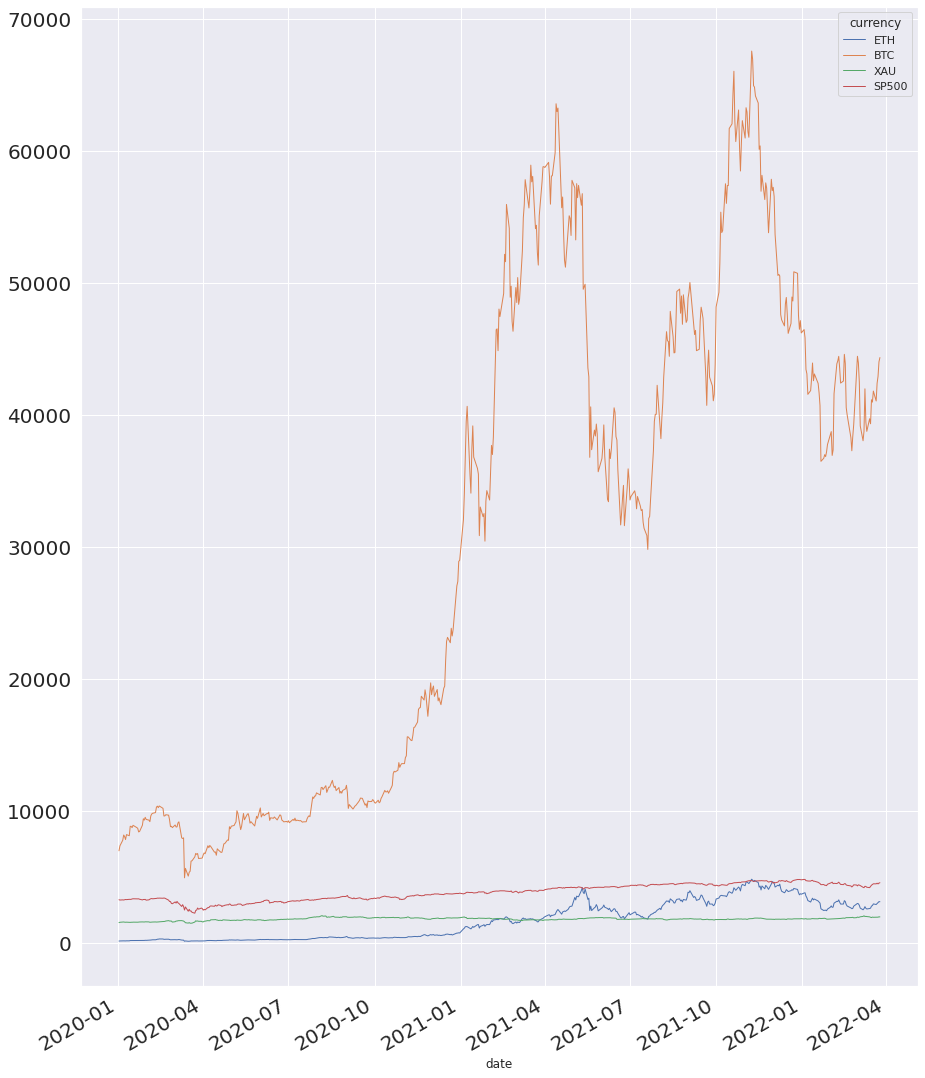

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.904259,0.203825,0.921342
BTC,0.904259,1.000000,0.171184,0.872351
XAU,0.203825,0.171184,1.000000,0.342560
SP500,0.921342,0.872351,0.342560,1.000000


In [8]:
#hide ### Koreliacijos matrica.

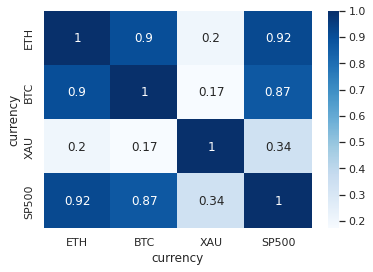

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')